In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('../../data/train.csv')
test = pd.read_csv('../../data/test.csv')
accounts = pd.read_csv('../../data/account.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19833 entries, 0 to 19832
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account.id               19833 non-null  object 
 1   amount.donated.2013      19833 non-null  float64
 2   amount.donated.lifetime  19833 non-null  float64
 3   no.donations.lifetime    19833 non-null  int64  
 4   first.donated            19833 non-null  float64
 5   billing.zip.code         19833 non-null  int64  
 6   billing.city             17615 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


/var/folders/y6/13836jg12870zm5gbd8445c40000gn/T/ipykernel_11340/1341762501.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accounts['first.donated'] = pd.to_datetime(accounts['first.donated'])


None

Missing data in accounts
account.id                    0
amount.donated.2013           0
amount.donated.lifetime       0
no.donations.lifetime         0
first.donated                 0
billing.zip.code              0
billing.city               2218
dtype: int64


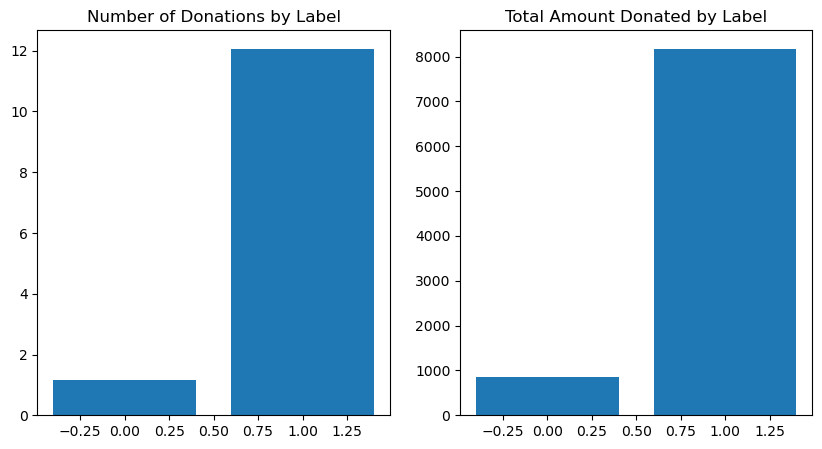

Missing training accounts 734
Missing test accounts 356


In [4]:
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()

accounts = accounts[['account.id', 'amount.donated.2013', 'amount.donated.lifetime', 'no.donations.lifetime', 'first.donated', 'billing.zip.code', 'billing.city']]
accounts['first.donated'] = pd.to_datetime(accounts['first.donated'])
accounts['first.donated'] = accounts['first.donated'].dt.year
accounts['first.donated'].fillna(0, inplace=True)

# Encode billing.zip.code column
accounts['billing.zip.code'].fillna("", inplace=True)
accounts['billing.zip.code'] = label_encoder.fit_transform(accounts['billing.zip.code'])

display(accounts.info())
# show missing data
print("Missing data in accounts")
print(accounts.isnull().sum())
accounts = accounts.dropna()

# plot the relation between the number of donations and "label" on train (match the two dataframes on account.id)
# there is one row per account in accounts and in train
num_donations_by_label = train.merge(accounts, on='account.id').groupby('label')['no.donations.lifetime'].mean()

# plot the relation between the total amount donated against the label and "label" on train (match the two dataframes on account.id)
total_donated_by_label = train.merge(accounts, on='account.id').groupby('label')['amount.donated.lifetime'].mean()

# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot the number of donations on the first subplot
axs[0].bar(num_donations_by_label.index, num_donations_by_label.values)
axs[0].set_title('Number of Donations by Label')

# plot the total amount donated on the second subplot
axs[1].bar(total_donated_by_label.index, total_donated_by_label.values)
axs[1].set_title('Total Amount Donated by Label')

# display the plot
plt.show()

# how many of rows in train are not in accounts?
print("Missing training accounts",train[~train['account.id'].isin(accounts['account.id'])].shape[0])
print("Missing test accounts",test[~test['ID'].isin(accounts['account.id'])].shape[0])
